# ML Projects - Main

For this week's project, we'll be using the dataset [Digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) dataset from [Scikit-Learn](http://scikit-learn.org/stable/).
This dataset contains the pixel value of a 8x8 image of a number, from 0 to 9.

## Purpose
1. We will use this dataset to train some of the algorithms that we mentioned in the last couple of weeks, i.e. [Naive Bayes Classifier](https://www.youtube.com/playlist?list=PLBv09BD7ez_6CxkuiFTbL3jsn2Qd1IU7B), [Decision Trees](https://www.youtube.com/playlist?list=PLBv09BD7ez_4_UoYeGrzvqveIR_USBEKD), and [k-Nearest Neighbor](https://www.youtube.com/playlist?list=PLBv09BD7ez_48heon5Az-TsyoXVYOJtDZ).
2. Each person will be assigned one _main_ algorithm. S/he will write her/his own machine learning code, and use the _Digits_ dataset to train it.
3. Each person will present his/her results on the next session (Feb. 17, 2016)

## Instructions
The code that you write can be uploaded to the [Github Repository](https://github.com/VandyAstroML/Vandy_AstroML) under the folder '__profiles/your-name__'.

### Steps
1. You first need to have access to the __VandyAstroML__ group. Otherwise, you won't be able to push your code to the repository. If you don't have access, let me (Victor) know.
2. Make a copy of the repositry onto your local machine.
3. Create a folder under '__profiles/your-name__'.
4. Write the code and save it in that directory.
5. __Update your local version before pushing your changes__. (Using _git pull_)
6. Add, commit, and push your changes.

In [30]:
%matplotlib inline
import matplotlib
import numpy as num
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

Loading the dataset and showing the number of features, sample size, etc

In [31]:
# Loading dataset
digits = load_digits()

You can read the description of the dataset by using the 'DESCR' key:

In [34]:
#print(digits['DESCR'])

X = digits.data
y = digits.target

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.92972973  0.98907104  0.97790055  0.97777778  0.96648045  0.98324022
  0.98882682  0.98314607  0.97740113  0.96590909]
0.973948287255


You can also see the structure and data that is included in the dataset

In [39]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.97614938602520218, 0.97671197596272707, 0.9777892113798643, 0.97282165725397274, 0.97394828725469063, 0.96951482797974065, 0.9700794639117305, 0.96672098562665276, 0.96731915128765722, 0.96453789195260331, 0.96561232468072655, 0.96620804017654616, 0.96507178414018602, 0.96451271993566468, 0.9645131249223089, 0.96396081370163866, 0.96339584195022621, 0.96396081370163866, 0.96339266795162293, 0.96120054609571248, 0.96062052503467377, 0.95953046703899125, 0.95953964367433675, 0.95897153338799246, 0.95671826644805547, 0.9556071553369444, 0.95504586203672626, 0.9561758067351066, 0.95449982908147535, 0.95449355201161157]


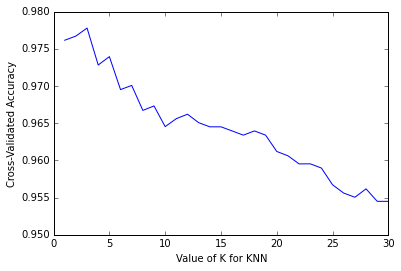

In [40]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [14]:
# Displaying different keys/attributes 
# of the dataset
print 'Keys:', digits.keys()

# Loading data
# This includes the pixel value for each of the samples
digits_data = digits['data']
print 'Data for 1st element:', digits_data[0]

# Targets
# This is what actual number for each sample, i.e. the 'truth'
digits_targetnames = digits['target_names']
print 'Target names:', digits_targetnames

digits_target = digits['target']
print 'Targets:', digits_target

Keys: ['images', 'data', 'target_names', 'DESCR', 'target']
Data for 1st element: [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
Target names: [0 1 2 3 4 5 6 7 8 9]
Targets: [0 1 2 ..., 8 9 8]


This means that you you have 1797 samples, and each of the them are characterized by 64 different features (pixel values).

We can also visualize some of the data, using the 'images' keys:

In [15]:
# Choosing a colormap
color_map_used = plt.get_cmap('autumn')

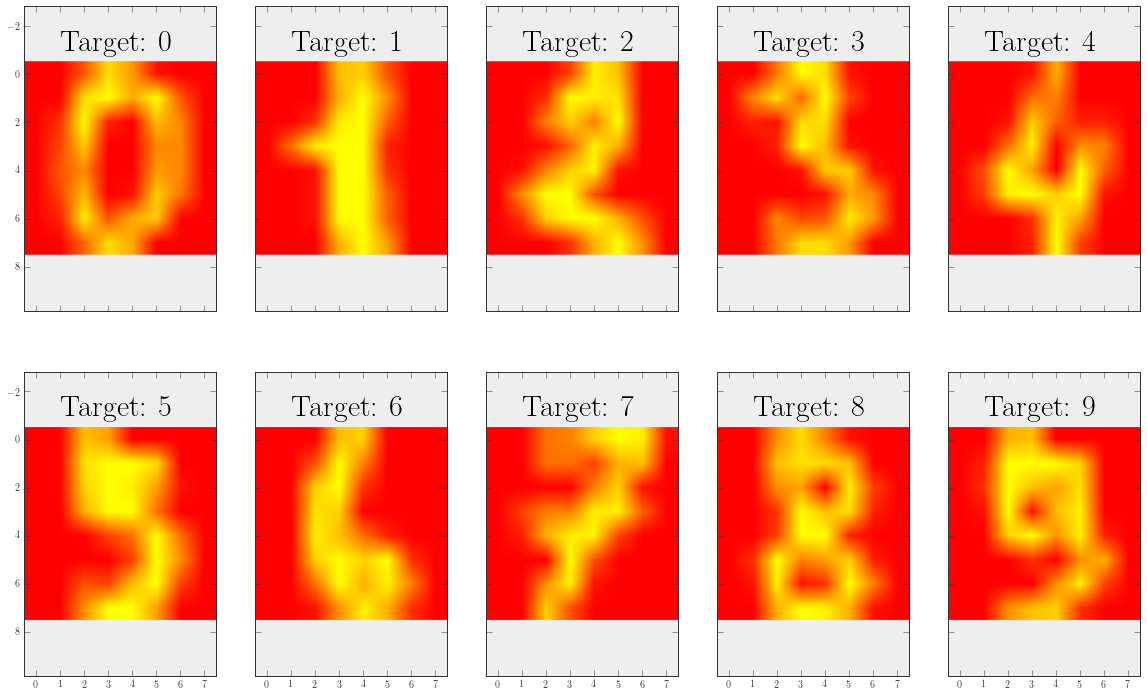

In [16]:
# Visualizing some of the targets
fig, axes = plt.subplots(2,5, sharex=True, sharey=True, figsize=(20,12))
axes_f = axes.flatten()
for ii in range(len(axes_f)):
    axes_f[ii].imshow(digits['images'][ii], cmap = color_map_used)
    axes_f[ii].text(1, -1, 'Target: {0}'.format(digits_target[ii]), fontsize=30)
plt.show()

The algorithm will be able to use the pixel values to determine that the first number is '0' and the other then is '4'.

Let's see some examples of the number _2_:

There are 177 samples of the number 2 in the dataset


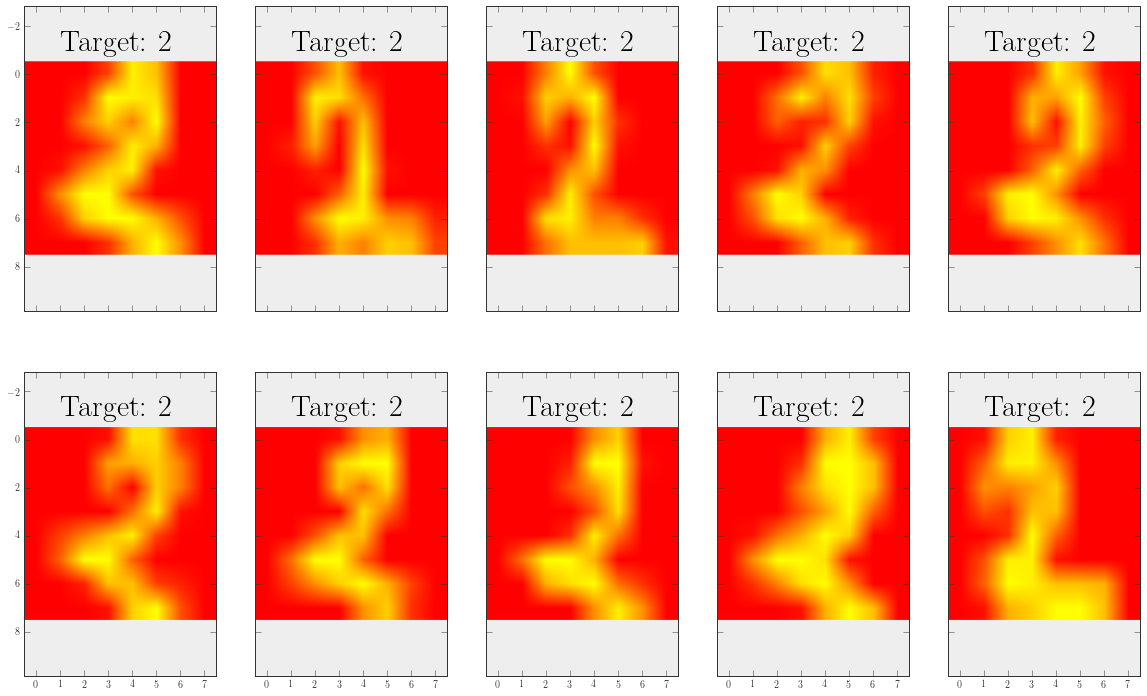

In [17]:
IDX2 = num.where( digits_target == 2)[0]
print 'There are {0} samples of the number 2 in the dataset'.format(IDX2.size)

fig, axes = plt.subplots(2,5, sharex=True, sharey=True, figsize=(20,12))
axes_f = axes.flatten()
for ii in range(len(axes_f)):
    axes_f[ii].imshow(digits['images'][IDX2][ii], cmap = color_map_used)
    axes_f[ii].text(1, -1, 'Target: {0}'.format(digits_target[IDX2][ii]), fontsize=30)
plt.show()

And now the number 4



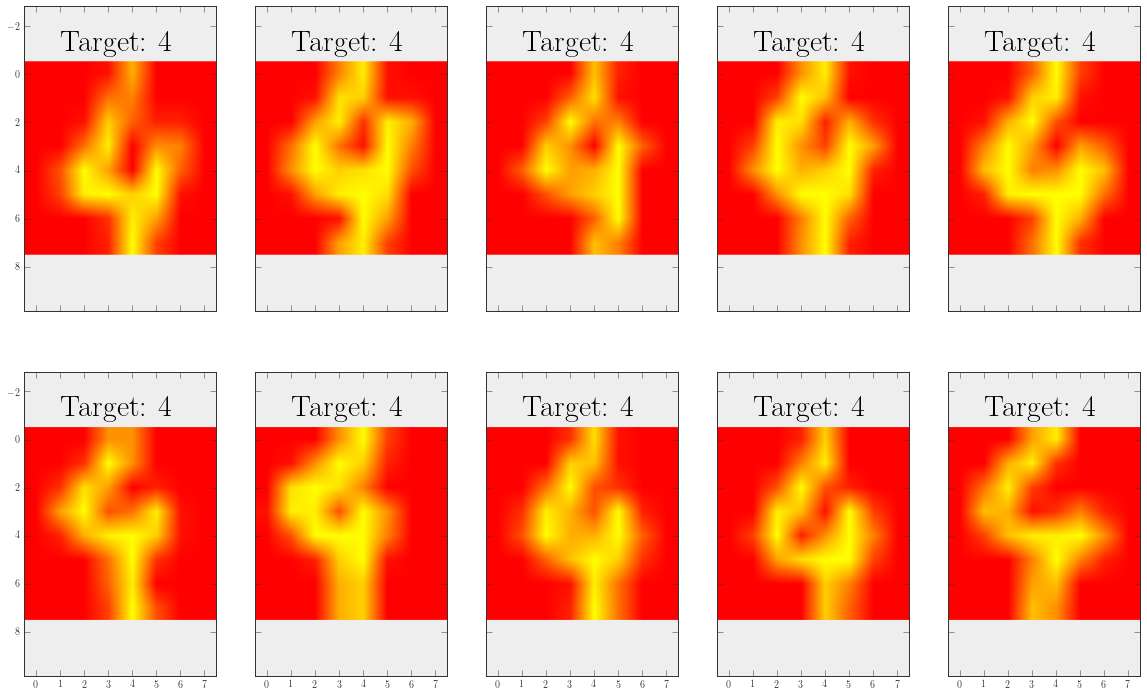

In [18]:
print 'And now the number 4\n'
IDX4 = num.where( digits_target == 4)[0]
fig, axes = plt.subplots(2,5, sharex=True, sharey=True, figsize=(20,12))
axes_f = axes.flatten()
for ii in range(len(axes_f)):
    axes_f[ii].imshow(digits['images'][IDX4][ii], cmap = color_map_used)
    axes_f[ii].text(1, -1, 'Target: {0}'.format(digits_target[IDX4][ii]), fontsize=30)
plt.show()

You can see how different each input by subtracting one target from another.
In here, I'm subtracting two images that represent the number '4':

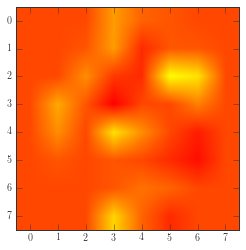

In [19]:
# Difference between two samples of the number 4
plt.imshow(digits['images'][IDX4][1] - digits['images'][IDX4][8], cmap=color_map_used)
plt.show()

This figure shows how different two samples can be from each other.